<a href="https://colab.research.google.com/github/psykeefuego/DS---ML/blob/main/Na%C3%AFveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22/2/24

**Naive Bayes Classifier:**

1.   Data Collection
2.   Pre-processing
        - cleaning
        - transformation
        - missing/ null/ NA values
3.   Data Exploration Analysis
        - data visualization
4.   Separate Dependent and Independent Variables
5.   Split the datset:
        - 70/30 or 75/25
        - X_Train, Y_Train, X_test and Y_test
6.   Select the Model
7.   Train the model
8.   Evaluate


HW: social_networks_ads










In [ ]:
#importing the required libraries
import pandas as pd
data=pd.read_csv('pima_indian.csv')
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()
#important

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#gives sum of null values for every column
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [ ]:
import seaborn as sb
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


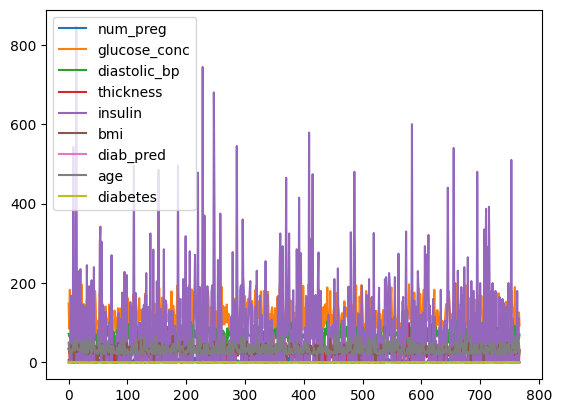

In [ ]:
data.plot()
plt.show()

<Axes: >

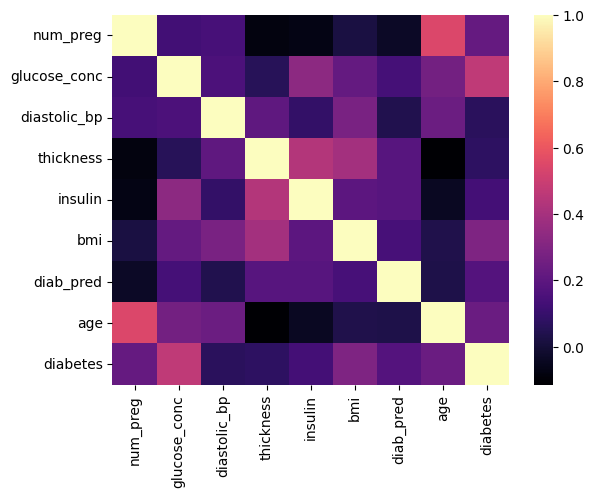

In [ ]:
sb.heatmap(data.corr(),cmap='magma')

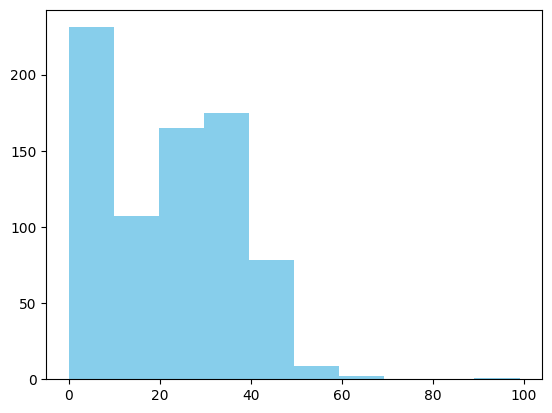

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data.thickness,color="skyblue")
plt.show()

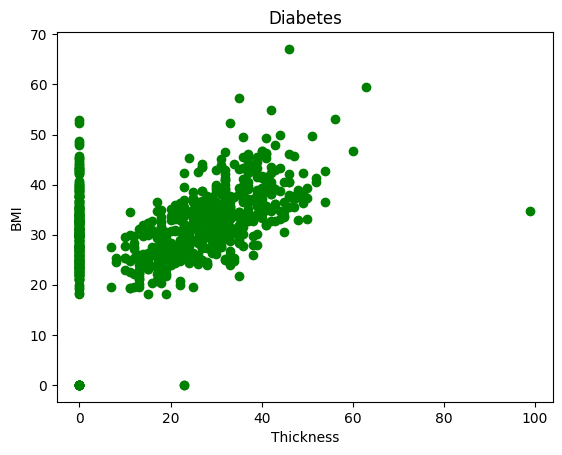

In [ ]:
plt.scatter(data.thickness, data.bmi,c='g')
plt.xlabel('Thickness')
plt.ylabel('BMI')
plt.title('Diabetes')
plt.show()

In [ ]:
#separating independent and dependent variables

data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [ ]:
X=data.drop("diabetes",axis=1) # axis=1 for column
y=data.diabetes

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

In [ ]:
X_train.shape

(537, 8)

In [ ]:
X_test.shape

(231, 8)

In [ ]:
y_train.shape

(537,)

In [ ]:
y_test.shape

(231,)

**Model Selection**

In [ ]:
from sklearn.naive_bayes import GaussianNB #gaussian naive bayesian model

In [ ]:
model = GaussianNB()

**Training**

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7965367965367965

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86       162\n           1       0.68      0.61      0.64        69\n\n    accuracy                           0.80       231\n   macro avg       0.76      0.74      0.75       231\nweighted avg       0.79      0.80      0.79       231\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[142,  20],
       [ 27,  42]])